# EDA & Word Analysis

Before training, I had to get to know the data. 

* The target distribution shows there are more non-disaster tweets than disaster ones, which can bias models toward predicting ‘safe’ all the time. 

* Tweets about disasters aren’t necessarily longer, but they often pack in urgent keywords like "fire" or "flood".

# Environment & Data

This section covers all the imports like libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [2]:
import sys, os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.data_visualization import plot_wordcloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/didodeboodt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/didodeboodt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/didodeboodt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/didodeboodt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set visualization pallete
sns.set_palette("Set2")

In [ ]:
# Load data
df_tweets = pd.read_csv('/Users/didodeboodt/Documents/Projects/NLP_Tweet_Disaster_Classifier/data/raw/full_data.csv')

# Data Overview

In [5]:
# Show the first few rows 
df_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Print basic statistics about the dataset
print("Total tweets:", len(df_tweets))
print("Disaster tweets:", df_tweets['target'].sum())
print("Non-disaster tweets:", len(df_tweets) - df_tweets['target'].sum())
print("Percentage of disaster tweets:", (df_tweets['target'].sum() / len(df_tweets)) * 100)

Total tweets: 7613
Disaster tweets: 3271
Non-disaster tweets: 4342
Percentage of disaster tweets: 42.96597924602653


In [7]:
# Print the shape and columns of the DataFrame
print("Rows and columns: ",df_tweets.shape)
print("Columns: ", df_tweets.columns.tolist())

Rows and columns:  (7613, 5)
Columns:  ['id', 'keyword', 'location', 'text', 'target']


# Target distribution

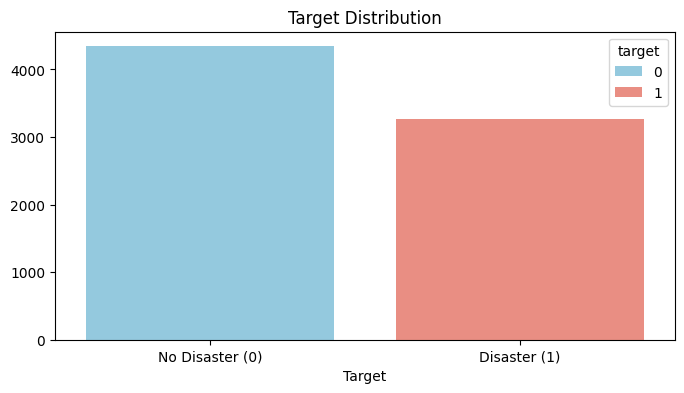

In [8]:
# Visualize the target distribution
colors = ['skyblue', 'salmon']

plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=df_tweets, palette=colors, hue='target')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.xticks([0, 1], ['No Disaster (0)', 'Disaster (1)'])
plt.ylabel('')
plt.show()

# Word Cloud

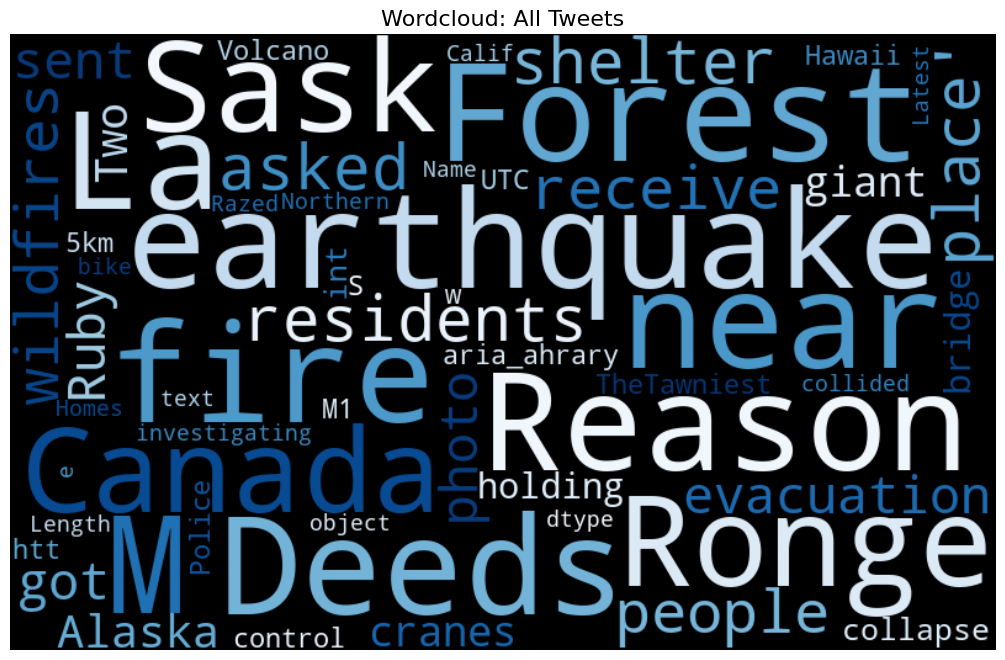

In [9]:
plot_wordcloud(df_tweets['text'], title="Wordcloud: All Tweets")

# Top 10 words in all tokens

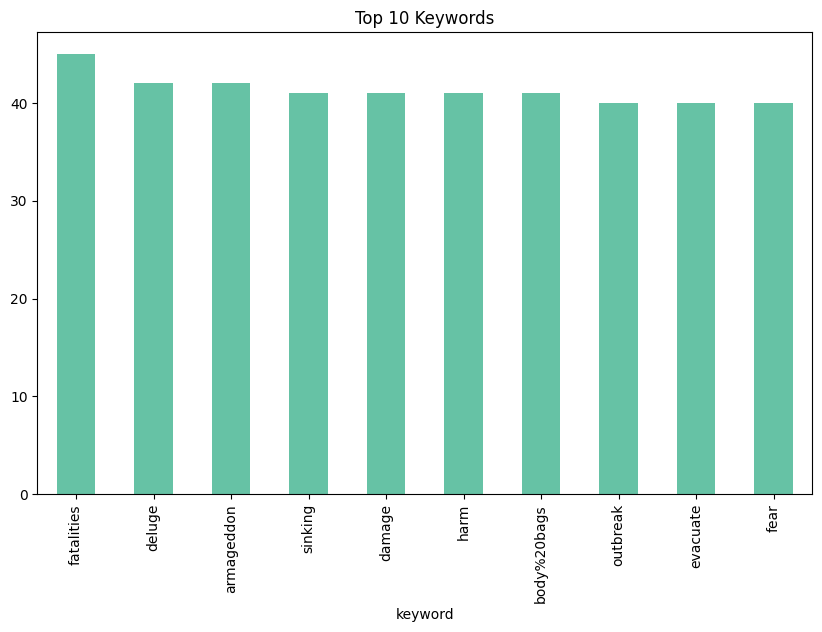

In [10]:
# Visualize top 10 words
plt.figure(figsize=(10, 6))
df_tweets['keyword'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Keywords')
plt.show()

# Tweet Length Distribution

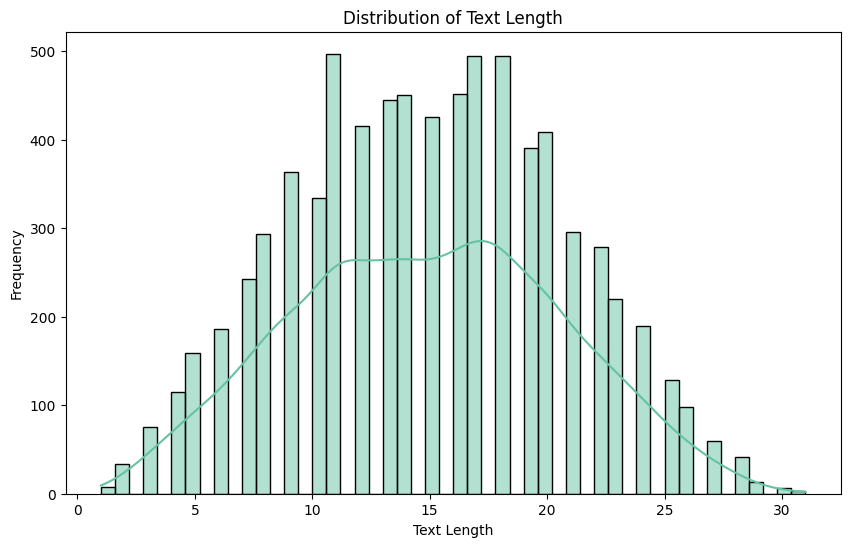

In [11]:
# Visualize the distribution of text length
df_tweets["text_length"] = df_tweets["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_tweets["text_length"], bins=50, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Locations

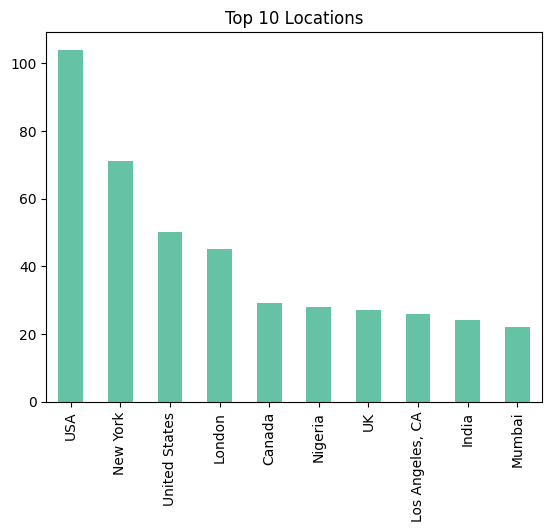

In [12]:
# Visualize the top 10 locations
df_tweets['location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Locations')
plt.xlabel('')
plt.show()

Looking at the locations, this column would require detailed cleaning and mapping variables to an umberella variable before analyzing. This could be done with SQL.